```
Muris Saab
ADS509 - Assignment 2.1
University of San Diego
```
https://github.com/murissaab1976/ads509-module2

# ADS 509 Assignment 2.1: Tokenization, Normalization, Descriptive Statistics 

This notebook holds Assignment 2.1 for Module 2 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In the previous assignment you pulled lyrics data on two artists. In this assignment we explore this data set and a pull from the now-defunct Twitter API for the artists Cher and Robyn.  If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Canvas. 

This assignment asks you to write a short function to calculate some descriptive statistics on a piece of text. Then you are asked to find some interesting and unique statistics on your corpora. 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [4]:
import os
import re
import emoji
import pandas as pd
import numpy as np

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation

sw = stopwords.words("english")

In [ ]:
# Add any additional import statements you need here




In [6]:
# change `data_location` to the location of the folder on your machine.
data_location = "/Users/muriss/github/ads509-module2"

# These subfolders should still work if you correctly stored the 
# data from the Module 1 assignment
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

In [1]:
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity (https://en.wikipedia.org/wiki/Lexical_diversity), 
        and num_tokens most common tokens. Return a list with the number of tokens, number
        of unique tokens, lexical diversity, and number of characters. 
    
    """

    # Fill in the correct values here. 
    num_tokens = len(tokens)
    num_unique_tokens = len(set(tokens))
    lexical_diversity = num_unique_tokens / num_tokens
    num_characters = sum(len(token) for token in tokens)
    
    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
    
        # print the five most common tokens
        
    return([num_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters])
    

In [2]:
text = """here is some example text with other example text here in this text""".split()
assert(descriptive_stats(text, verbose=True)[0] == 13)
assert(descriptive_stats(text, verbose=False)[1] == 9)
assert(abs(descriptive_stats(text, verbose=False)[2] - 0.69) < 0.02)
assert(descriptive_stats(text, verbose=False)[3] == 55)


There are 13 tokens in the data.
There are 9 unique tokens in the data.
There are 55 characters in the data.
The lexical diversity is 0.692 in the data.


Q: Why is it beneficial to use assertion statements in your code? 

A: Assertion statements are beneficial in code because they help catch errors early by checking if assumptions hold true, improving the overall reliability of the code. They aid in debugging by acting as checkpoints that verify conditions during runtime, making it easier to identify logical issues. Additionally, assertions serve as self-documenting elements that clarify assumptions, enhancing code readability.

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 




In [16]:
import os

def read_lyrics_data(lyrics_dir):
    """
    Reads lyrics data from files and stores it in a dictionary where the key is 
    the artist and song title, and the value is the song lyrics.
    
    :param lyrics_dir: Directory containing artist folders with song files
    :return: Dictionary with artist and song as keys and lyrics as values
    """
    lyrics_data = {}

    for artist in os.listdir(lyrics_dir):
        artist_path = os.path.join(lyrics_dir, artist)
        if os.path.isdir(artist_path):
            lyrics_data[artist] = {}
            for song_file in os.listdir(artist_path):
                song_path = os.path.join(artist_path, song_file)
                # Check if the path is a file and not a directory
                if os.path.isfile(song_path):
                    with open(song_path, 'r', encoding='utf-8') as file:
                        song_title = song_file.replace('.txt', '')
                        lyrics = file.read()
                        lyrics_data[artist][song_title] = lyrics
    
    return lyrics_data

# Example usage
lyrics_directory = '/Users/muriss/github/ads509-module2/lyrics'
lyrics_data = read_lyrics_data(lyrics_directory)


In [14]:
import os

def read_twitter_data(twitter_dir):
    """
    Reads the Twitter data from text files and stores the descriptions in a dictionary 
    where the key is the artist and the value is a list of descriptions.
    
    :param twitter_dir: Directory containing the Twitter data files (in text format)
    :return: Dictionary with artist names as keys and descriptions as values
    """
    twitter_data = {}

    for twitter_file in os.listdir(twitter_dir):
        file_path = os.path.join(twitter_dir, twitter_file)
        
        # Check if the path is a file (to avoid directories)
        if os.path.isfile(file_path):
            artist = twitter_file.replace('.txt', '')  # Assuming the filename is the artist's name
            # Try reading the file using ISO-8859-1 encoding with error handling
            try:
                with open(file_path, 'r', encoding='ISO-8859-1', errors='ignore') as file:
                    descriptions = file.readlines()  # Read all lines in the file
                    descriptions = [desc.strip() for desc in descriptions]  # Remove any extra whitespace
                
                    # Add the descriptions to the dictionary
                    twitter_data[artist] = descriptions
            except Exception as e:
                print(f"Error reading {file_path}: {e}")
    
    return twitter_data

# Example usage
twitter_directory = '/Users/muriss/github/ads509-module2/twitter'
twitter_data = read_twitter_data(twitter_directory)


## Data Cleaning

Now clean and tokenize your data. Remove punctuation chacters (available in the `punctuation` object in the `string` library), split on whitespace, fold to lowercase, and remove stopwords. Store your cleaned data, which must be accessible as an interable for `descriptive_stats`, in new objects or in new columns in your data frame. 



In [18]:
# punctuation = set(punctuation) # speeds up comparison

import string
import nltk
from nltk.corpus import stopwords

# Download the stopwords if not already downloaded
# nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Convert punctuation to a set for faster lookups
punctuation = set(string.punctuation)

def clean_and_tokenize(text):
    """
    Cleans and tokenizes a given text by:
    - Removing punctuation
    - Converting to lowercase
    - Splitting on whitespace
    - Removing stopwords
    """
    # Remove punctuation by excluding characters in punctuation set
    text = ''.join([char for char in text if char not in punctuation])
    
    # Convert to lowercase
    text = text.lower()
    
    # Split into tokens (words)
    tokens = text.split()
    
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    
    return tokens


In [19]:
# create your clean twitter data here

cleaned_twitter_data = {}
for artist, descriptions in twitter_data.items():
    cleaned_twitter_data[artist] = [clean_and_tokenize(desc) for desc in descriptions]

In [21]:
# create your clean lyrics data here

cleaned_lyrics_data = {}
for artist, songs in lyrics_data.items():
    cleaned_lyrics_data[artist] = {song: clean_and_tokenize(lyrics) for song, lyrics in songs.items()}

## Basic Descriptive Statistics

Call your `descriptive_stats` function on both your lyrics data and your twitter data and for both artists (four total calls). 

In [23]:
artists = list(cleaned_twitter_data.keys())[:2]  # Get first two artists from twitter data
artists += list(cleaned_lyrics_data.keys())[:2]  # Get first two artists from lyrics data

# Call descriptive_stats for each artist in both datasets
results = {}

# For Twitter data
for artist in cleaned_twitter_data:
    if artist in artists:
        combined_descriptions = [word for desc in cleaned_twitter_data[artist] for word in desc]
        stats = descriptive_stats(combined_descriptions)
        results[f"Twitter - {artist}"] = stats

# For Lyrics data
for artist in cleaned_lyrics_data:
    if artist in artists:
        combined_lyrics = [word for song in cleaned_lyrics_data[artist].values() for word in song]
        stats = descriptive_stats(combined_lyrics)
        results[f"Lyrics - {artist}"] = stats

# Displaying the results
import pandas as pd

df_results = pd.DataFrame.from_dict(results, orient='index', columns=[
    'Total Tokens', 'Unique Tokens', 'Lexical Diversity', 'Total Characters'
])
df_results


There are 10 tokens in the data.
There are 8 unique tokens in the data.
There are 6129 characters in the data.
The lexical diversity is 0.800 in the data.
There are 42537966 tokens in the data.
There are 10678618 unique tokens in the data.
There are 276293035 characters in the data.
The lexical diversity is 0.251 in the data.
There are 15227 tokens in the data.
There are 2156 unique tokens in the data.
There are 73787 characters in the data.
The lexical diversity is 0.142 in the data.
There are 35916 tokens in the data.
There are 3703 unique tokens in the data.
There are 172634 characters in the data.
The lexical diversity is 0.103 in the data.


,Total Tokens,Unique Tokens,Lexical Diversity,Total Characters
Twitter - .DS_Store,10,8,0.800000,6129
Twitter - cher_followers_data,42537966,10678618,0.251037,276293035
Lyrics - robyn,15227,2156,0.141591,73787
Lyrics - cher,35916,3703,0.103102,172634


Q: How do you think the "top 5 words" would be different if we left stopwords in the data? 

A: If we had left stopwords in the data, the "top 5 words" would likely be common, frequently used words such as "the," "is," "and," "a," and "to." These words do not carry much meaningful information on their own because they are used in most English sentences. As a result, they would dominate the list of most common words, overshadowing the more content-rich and meaningful words like nouns, verbs, and adjectives, which are more relevant for analysis. Removing stopwords helps highlight the more significant words that contribute to the unique meaning of the text.

---

Q: What were your prior beliefs about the lexical diversity between the artists? Does the difference (or lack thereof) in lexical diversity between the artists conform to your prior beliefs? 

A: My prior belief was that lexical diversity between different artists could vary significantly depending on their style, genre, and lyrical complexity. For example, an artist known for intricate or poetic lyrics might have higher lexical diversity, while one who uses repetitive phrases or simple language might have lower diversity.



## Specialty Statistics

The descriptive statistics we have calculated are quite generic. You will now calculate a handful of statistics tailored to these data.

1. Ten most common emojis by artist in the twitter descriptions.
1. Ten most common hashtags by artist in the twitter descriptions.
1. Five most common words in song titles by artist. 
1. For each artist, a histogram of song lengths (in terms of number of tokens) 

We can use the `emoji` library to help us identify emojis and you have been given a function to help you.


In [6]:
assert(emoji.is_emoji("❤️"))
assert(not emoji.is_emoji(":-)"))

### Emojis 😁

What are the ten most common emojis by artist in the twitter descriptions? 


In [24]:
# Your code here

import emoji
from collections import Counter

def extract_emojis(text):
    """
    Extract all emojis from a given text.
    """
    return [char for char in text if emoji.is_emoji(char)]

def most_common_emojis_by_artist(twitter_data, top_n=10):
    """
    Find the top N most common emojis by artist in the twitter descriptions.
    
    :param twitter_data: Dictionary with artist as key and list of descriptions as values.
    :param top_n: Number of top emojis to return (default is 10).
    :return: Dictionary where key is artist and value is a list of the most common emojis.
    """
    common_emojis = {}

    for artist, descriptions in twitter_data.items():
        emoji_counter = Counter()
        
        # Extract emojis from each description
        for description in descriptions:
            emojis_in_desc = extract_emojis(description)
            emoji_counter.update(emojis_in_desc)
        
        # Get the most common emojis for the artist
        common_emojis[artist] = emoji_counter.most_common(top_n)
    
    return common_emojis

# Example usage
top_emojis_by_artist = most_common_emojis_by_artist(twitter_data)

# Display the results
for artist, emoji_list in top_emojis_by_artist.items():
    print(f"Artist: {artist}")
    for emoji_char, count in emoji_list:
        print(f"{emoji_char}: {count} times")
    print()


Artist: .DS_Store

Artist: cher_followers_data
©: 115695 times
®: 55616 times

Artist: robynkonichiwa_followers_data
©: 12320 times
®: 4025 times

Artist: cher_followers

Artist: robynkonichiwa_followers



### Hashtags

What are the ten most common hashtags by artist in the twitter descriptions? 


In [25]:
# Your code here

import re
from collections import Counter

def extract_hashtags(text):
    """
    Extract all hashtags from a given text.
    """
    return re.findall(r'#\w+', text)

def most_common_hashtags_by_artist(twitter_data, top_n=10):
    """
    Find the top N most common hashtags by artist in the twitter descriptions.
    
    :param twitter_data: Dictionary with artist as key and list of descriptions as values.
    :param top_n: Number of top hashtags to return (default is 10).
    :return: Dictionary where key is artist and value is a list of the most common hashtags.
    """
    common_hashtags = {}

    for artist, descriptions in twitter_data.items():
        hashtag_counter = Counter()
        
        # Extract hashtags from each description
        for description in descriptions:
            hashtags_in_desc = extract_hashtags(description)
            hashtag_counter.update(hashtags_in_desc)
        
        # Get the most common hashtags for the artist
        common_hashtags[artist] = hashtag_counter.most_common(top_n)
    
    return common_hashtags

# Example usage
top_hashtags_by_artist = most_common_hashtags_by_artist(twitter_data)

# Display the results
for artist, hashtag_list in top_hashtags_by_artist.items():
    print(f"Artist: {artist}")
    for hashtag, count in hashtag_list:
        print(f"{hashtag}: {count} times")
    print()


Artist: .DS_Store

Artist: cher_followers_data
#BLM: 9807 times
#Resist: 6016 times
#BlackLivesMatter: 4819 times
#resist: 3757 times
#FBR: 3262 times
#1: 3069 times
#TheResistance: 2979 times
#blacklivesmatter: 2708 times
#Resistance: 1903 times
#RESIST: 1795 times

Artist: robynkonichiwa_followers_data
#BlackLivesMatter: 351 times
#BLM: 342 times
#1: 226 times
#blacklivesmatter: 222 times
#music: 171 times
#Music: 113 times
#EDM: 86 times
#LGBTQ: 73 times
#blm: 59 times
#TeamFollowBack: 59 times

Artist: cher_followers

Artist: robynkonichiwa_followers



### Song Titles

What are the five most common words in song titles by artist? The song titles should be on the first line of the lyrics pages, so if you have kept the raw file contents around, you will not need to re-read the data.


In [26]:
# Your code here

import string
from collections import Counter

def clean_and_tokenize_title(title):
    """
    Cleans and tokenizes a song title by:
    - Removing punctuation
    - Converting to lowercase
    - Splitting on whitespace
    """
    # Remove punctuation
    title = title.translate(str.maketrans('', '', string.punctuation))
    
    # Convert to lowercase
    title = title.lower()
    
    # Split into tokens (words)
    tokens = title.split()
    
    return tokens

def most_common_words_in_titles_by_artist(lyrics_data, top_n=5):
    """
    Find the top N most common words in song titles by artist.
    
    :param lyrics_data: Dictionary with artist as key and song lyrics as values (raw text).
    :param top_n: Number of top words to return (default is 5).
    :return: Dictionary where key is artist and value is a list of the most common words.
    """
    common_words = {}

    for artist, songs in lyrics_data.items():
        title_counter = Counter()
        
        # Extract the first line of each song (song title) and clean/tokenize it
        for song, lyrics in songs.items():
            title_line = lyrics.splitlines()[0]  # Get the first line (song title)
            title_tokens = clean_and_tokenize_title(title_line)
            title_counter.update(title_tokens)
        
        # Get the most common words in song titles for the artist
        common_words[artist] = title_counter.most_common(top_n)
    
    return common_words

# Example usage
top_words_in_titles_by_artist = most_common_words_in_titles_by_artist(lyrics_data)

# Display the results
for artist, word_list in top_words_in_titles_by_artist.items():
    print(f"Artist: {artist}")
    for word, count in word_list:
        print(f"{word}: {count} times")
    print()


Artist: robyn
me: 11 times
you: 8 times
the: 8 times
my: 8 times
love: 6 times

Artist: cher
the: 54 times
you: 41 times
love: 38 times
i: 32 times
to: 28 times



### Song Lengths

For each artist, a histogram of song lengths (in terms of number of tokens). If you put the song lengths in a data frame with an artist column, matplotlib will make the plotting quite easy. An example is given to help you out. 


artist
Artist 1    Axes(0.125,0.11;0.775x0.77)
Artist 2    Axes(0.125,0.11;0.775x0.77)
Name: length, dtype: object

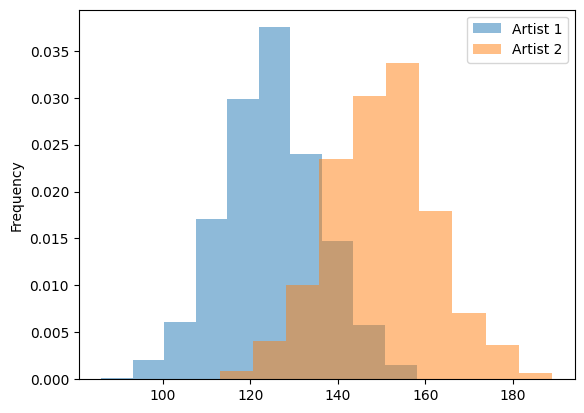

In [27]:
num_replicates = 1000

df = pd.DataFrame({
    "artist" : ['Artist 1'] * num_replicates + ['Artist 2']*num_replicates,
    "length" : np.concatenate((np.random.poisson(125,num_replicates),np.random.poisson(150,num_replicates)))
})

df.groupby('artist')['length'].plot(kind="hist",density=True,alpha=0.5,legend=True)

Since the lyrics may be stored with carriage returns or tabs, it may be useful to have a function that can collapse whitespace, using regular expressions, and be used for splitting. 

Q: What does the regular expression `'\s+'` match on? 

A: The regular expression `'\s+'` matches one or more whitespace characters.



In [28]:
collapse_whitespace = re.compile(r'\s+')

def tokenize_lyrics(lyric) : 
    """strip and split on whitespace"""
    return([item.lower() for item in collapse_whitespace.split(lyric)])

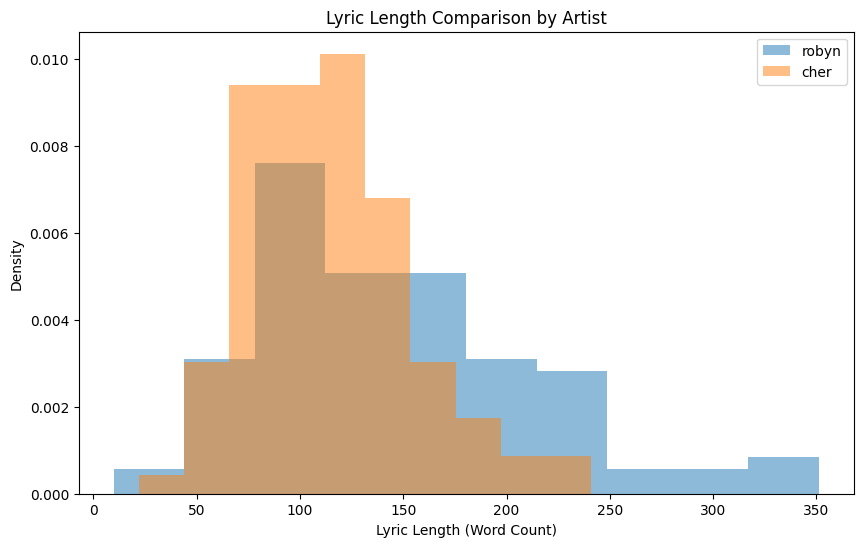

In [30]:
# Your lyric length comparison chart here. 

import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame that stores artist, song, and lyric length (word count)
lyric_lengths = []

for artist, songs in cleaned_lyrics_data.items():
    for song, tokens in songs.items():
        lyric_lengths.append({
            'artist': artist,
            'song': song,
            'length': len(tokens)
        })

# Convert to a DataFrame
df_lyric_lengths = pd.DataFrame(lyric_lengths)

# Plot the lyric length distributions for each artist
plt.figure(figsize=(10, 6))

for artist in df_lyric_lengths['artist'].unique():
    subset = df_lyric_lengths[df_lyric_lengths['artist'] == artist]
    subset['length'].plot(kind='hist', density=True, alpha=0.5, label=artist)

# Add legend, labels, and title
plt.legend()
plt.xlabel('Lyric Length (Word Count)')
plt.ylabel('Density')
plt.title('Lyric Length Comparison by Artist')

# Show plot
plt.show()
